In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from subprocess import call
from os import system
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
df_s = pd.read_csv('test.csv')

In [7]:
df.set_index('PassengerId',inplace=True) 
df_t.set_index('PassengerId',inplace=True) 

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_t.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df_t.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [12]:
df.drop(columns=['Cabin','Name','Ticket','SibSp','Parch'],inplace=True)
df_t.drop(columns=['Cabin','Name','Ticket','SibSp','Parch'],inplace=True)

In [13]:
df['Age'] = df['Age'].fillna(df.mean()['Age'])
df_t['Age'] = df_t['Age'].fillna(df_t.mean()['Age'])

In [14]:
df['Embarked'] = df['Embarked'].fillna(value = df.mode()['Embarked'][0])
# .mode() returns a series object, to access its 1st element use -> df.mode()['Embarked'][0]

In [15]:
df_t['Fare'] = df_t['Fare'].fillna(df_t.mean()['Fare'])

In [16]:
df_t.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

# EDA

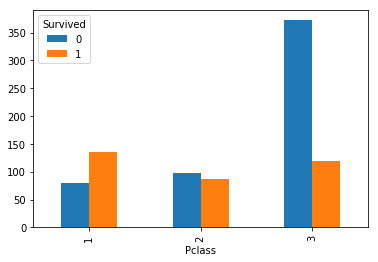

In [19]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

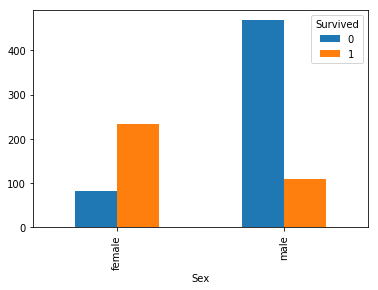

In [20]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

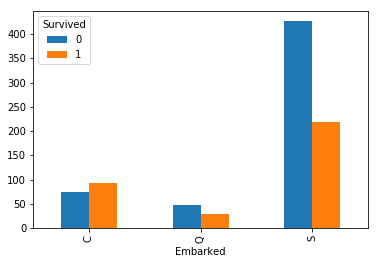

In [21]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

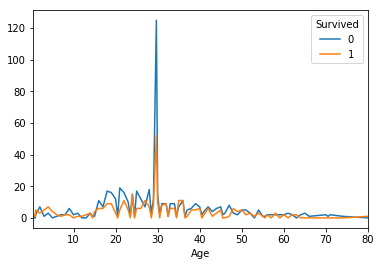

In [22]:
pd.crosstab(df.Age,df.Survived).plot(kind='line')

## Preparing x_train and y_train

In [23]:
y_train = df.iloc[:,0]
x_train = df.drop(columns=['Survived'])

In [24]:
x_test = df_t

#### Jump to --> pd.get_dummies() to execute further

### Label Encoder M-1

In [603]:
le = LabelEncoder()
x_train.iloc[:,1]=le.fit_transform(x_train.iloc[:,1])
x_train.iloc[:,4]=le.fit_transform(x_train.iloc[:,4])

### Label Encoder M-2

In [ ]:
# Categorical boolean mask
categorical_feature_mask = x_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = x_train.columns[categorical_feature_mask].tolist()
#categorical_cols

le = LabelEncoder()
x_train[categorical_cols] = x_train[categorical_cols].apply(lambda col: le.fit_transform(col))
x_train[categorical_cols].head(10)

In [458]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,
1,3,male,22.0,7.2500,S
2,1,female,38.0,71.2833,C
3,3,female,26.0,7.9250,S
4,1,female,35.0,53.1000,S
5,3,male,35.0,8.0500,S


### One Hot Encoder

In [351]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [ ]:
x_train = ohe.fit_transform(x_train) # It returns an numpy array

### pd.get_dummies()

In [25]:
dummy_gender = pd.get_dummies(x_train['Sex'],prefix='Sex')

In [26]:
dummy_emb = pd.get_dummies(x_train['Embarked'],prefix='Embarked')

In [27]:
dummy_pcls = pd.get_dummies(x_train['Pclass'],prefix='Pclass')

In [28]:
x_train = x_train[x_train.columns.values].join(dummy_gender).join(dummy_emb).join(dummy_pcls)

In [29]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,3,male,22.0,7.2500,S,0,1,0,0,1,0,0,1
2,1,female,38.0,71.2833,C,1,0,1,0,0,1,0,0
3,3,female,26.0,7.9250,S,1,0,0,0,1,0,0,1
4,1,female,35.0,53.1000,S,1,0,0,0,1,1,0,0
5,3,male,35.0,8.0500,S,0,1,0,0,1,0,0,1


In [30]:
x_train.drop(columns=['Pclass','Sex','Embarked'],inplace=True)

In [31]:
x_train.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
1,22.0,7.2500,0,1,0,0,1,0,0,1
2,38.0,71.2833,1,0,1,0,0,1,0,0
3,26.0,7.9250,1,0,0,0,1,0,0,1
4,35.0,53.1000,1,0,0,0,1,1,0,0
5,35.0,8.0500,0,1,0,0,1,0,0,1


In [51]:
predictors = x_train.columns.values.tolist()[2:]
predictors

['Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [32]:
dummy_gender_t = pd.get_dummies(x_test['Sex'],prefix='Sex')
dummy_emb_t = pd.get_dummies(x_test['Embarked'],prefix='Embarked')
dummy_pcls_t = pd.get_dummies(x_test['Pclass'],prefix='Pclass')
x_test = x_test[x_test.columns.values].join(dummy_gender_t).join(dummy_emb_t).join(dummy_pcls_t)
x_test.drop(columns=['Pclass','Sex','Embarked'],inplace=True)

In [33]:
x_test.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
892,34.5,7.8292,0,1,0,1,0,0,0,1
893,47.0,7.0000,1,0,0,0,1,0,0,1
894,62.0,9.6875,0,1,0,1,0,0,1,0
895,27.0,8.6625,0,1,0,0,1,0,0,1
896,22.0,12.2875,1,0,0,0,1,0,0,1


## Feature Selection

In [100]:
model = LogisticRegression()
rfe = RFE(model,8)
rfe = rfe.fit(x_train,y_train)

In [101]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True]
[2 3 1 1 1 1 1 1 1 1]


## Implementing the model

In [36]:
logit_model = sm.Logit(y_train,x_train.iloc[:,2:])
res = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.459610
         Iterations 11


In [37]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.3098
Time:                        07:42:29   Log-Likelihood:                -409.51
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.797e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex_female     1.4161        nan        nan        nan         nan         nan
Sex_male      -1.1981        nan        nan        nan         nan         nan
Embarked_C     0.3175        nan        nan        n

C:\Users\Rohit Peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Rohit Peter\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Rohit Peter\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Rohit Peter\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Implementing the model with Sci-kit

## Logistic Regression

In [38]:
clf = LogisticRegression()
clf.fit(x_train.iloc[:,2:],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
acc_log = round(clf.score(x_train.iloc[:,2:], y_train) * 100, 2)
acc_log

77.78

In [709]:
y_pred = clf.predict(x_test.iloc[:,2:])

In [710]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [711]:
y_pred.sum()

180

In [733]:
list_ = list(zip(df_s.PassengerId,y_pred))
final_sub = pd.DataFrame(list_, columns = ['PassengerId', 'Survived'])  

In [735]:
final_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Decision Tree Classifier

In [44]:
dt_e = DecisionTreeClassifier(criterion='entropy',min_samples_split=20)
dt_e.fit(x_train.iloc[:,2:],y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
dt_g = DecisionTreeClassifier(criterion='gini',min_samples_split=20)
dt_g.fit(x_train.iloc[:,2:],y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
acc_decision_tree = round(dt_e.score(x_train.iloc[:,2:],y_train) * 100, 2)
acc_decision_tree

81.14

In [47]:
acc_decision_tree = round(dt_g.score(x_train.iloc[:,2:],y_train) * 100, 2)
acc_decision_tree

81.14

### Decision Tree Prediction

In [87]:
y_pred_dt = dt_e.predict(x_test.iloc[:,2:])

In [88]:
list_ = list(zip(df_s.PassengerId,y_pred_dt))
final_sub_dt = pd.DataFrame(list_, columns = ['PassengerId', 'Survived'])  

In [93]:
final_sub_dt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Visualizing Decision Tree

In [52]:
with open('dtree.dot','w') as dotfile:
    export_graphviz(dt,out_file=dotfile,feature_names=predictors)
dotfile.close()

In [79]:
system("dot -Tpng dtree.dot -o dtree1.png")

1

## -------------------------------------------------------------------------------------------------------------------------------

In [58]:
!dot -Tpng dtree.dot -o dtree.png -Gdpi=600

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [70]:
export_graphviz(dt_e, out_file='dtree1.dot', feature_names = predictors,
                rounded = True, proportion = False, precision = 2, filled = True)
print("dot_data:", type(dot_data),dot_data)

In [ ]:
call(['dot', '-Tpng', 'dtree1.dot', '-o', 'tree.png', '-Gdpi=600'])

In [86]:
dot_data = StringIO()

export_graphviz(dt_e, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


dot_data: <class '_io.StringIO'> <_io.StringIO object at 0x0000028CF4511828>


In [ ]:
dot_data = StringIO()
export_graphviz(dt_e, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

## Voting Classifier

In [95]:
log_reg = LogisticRegression(random_state=1)
d_tree  = DecisionTreeClassifier(random_state=1)

In [102]:
vc = VotingClassifier(estimators=[('lr',log_reg),('dt',d_tree)],voting='hard')

In [103]:
vc.fit(x_train.iloc[:,2:],y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', DecisionTre...         min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [107]:
acc_voting_classifier = round(vc.score(x_train.iloc[:,2:],y_train) * 100, 2)
acc_voting_classifier

81.14

## Random Forest

In [111]:
rf= RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(x_train.iloc[:,2:],y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [112]:
acc_random_forest = round(rf.score(x_train.iloc[:,2:],y_train) * 100, 2)
acc_random_forest

41.47